# Machine Learning Classification

What is Classification in Machine Learning?

Classification is a type of Supervised Learning where the goal is to predict categories or labels.

Examples:

- Email → Spam or Not Spam

- Diagnosis → Diabetic or Non-Diabetic

- Banking → Fraud or Legit

- Customer → Will Churn or Not

The output is categorical.

| Algorithm               | Type           | Best For               | Example Use         |
| ----------------------- | -------------- | ---------------------- | ------------------- |
| **Logistic Regression** | Linear         | Binary classification  | Spam vs Not Spam    |
| **Decision Tree**       | Non-linear     | Simple & interpretable | Loan approval       |
| **Random Forest**       | Ensemble       | High accuracy, robust  | Fraud detection     |
| **KNN**                 | Distance-based | Small datasets         | Recommender         |
| **SVM**                 | Margin-based   | High-dimensional data  | Text classification |
| **Naive Bayes**         | Probabilistic  | Text data              | Sentiment analysis  |




### **Machine Learning Workflow**
Below is the typical ML workflow:

1. **Data Collection**
2. **Data Preprocessing**
3. **Model Training**
4. **Model Evaluation**
5. **Model Deployment**
6. **Prediction**

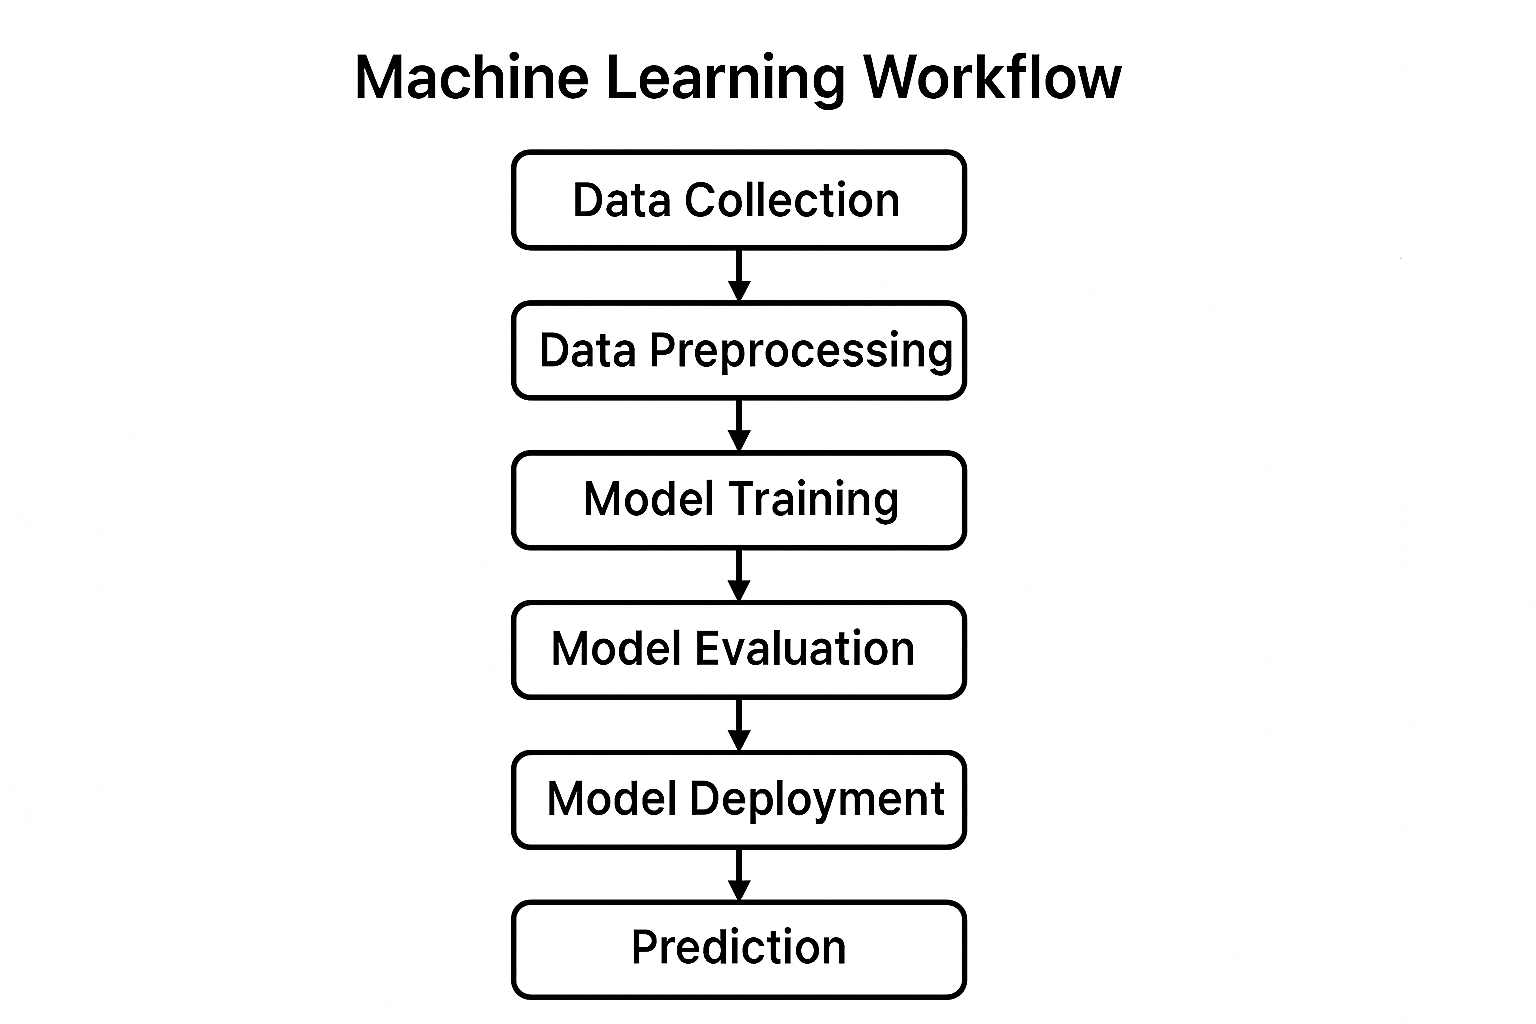


### Predicting Hiring Chances

We will cover the basics of **Machine Learning Classification** using Python with a real-world inspired example: predicting whether a candidate will be hired based on their profile.

## **1. Python Setup**

We will use the following libraries:
- `pandas` and `numpy` for data manipulation
- `scikit-learn` for ML algorithms and preprocessing
- `matplotlib` and `seaborn` for visualization


In [1]:
# Install required libraries if not already installed
# !pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### **2. Data Preprocessing for Classification**


In [2]:
H_data=pd.read_excel("Hiringdataset.xlsx")
H_data

,YearsExperience,EducationLevel,SkillsScore,CertificationCount,Hired
0,NaN,1.0,98.0,4.0,0
1,3.0,2.0,64.0,5.0,0
2,12.0,NaN,96.0,NaN,0
3,14.0,1.0,67.0,0.0,0
4,10.0,2.0,41.0,4.0,0
...,...,...,...,...,...
1195,12.0,1.0,55.0,5.0,0
1196,9.0,2.0,93.0,0.0,0
1197,2.0,3.0,NaN,3.0,0
1198,2.0,2.0,81.0,2.0,0


In [3]:
print("\nInfo:")
H_data.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearsExperience     1140 non-null   float64
 1   EducationLevel      1140 non-null   float64
 2   SkillsScore         1140 non-null   float64
 3   CertificationCount  1140 non-null   float64
 4   Hired               1200 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.0 KB


In [4]:
print("\nStatistical Summary:")
H_data.describe() # Numerical



Statistical Summary:


,YearsExperience,EducationLevel,SkillsScore,CertificationCount,Hired
count,1140.000000,1140.000000,1140.000000,1140.000000,1200.000000
mean,7.470175,1.999123,69.542982,2.513158,0.115000
std,4.694157,0.813084,17.613221,1.708524,0.319155
min,0.000000,1.000000,40.000000,0.000000,0.000000
25%,3.000000,1.000000,54.000000,1.000000,0.000000
50%,7.000000,2.000000,69.000000,3.000000,0.000000
75%,11.000000,3.000000,85.000000,4.000000,0.000000
max,15.000000,3.000000,100.000000,5.000000,1.000000


In [7]:
#H_data.describe(include = object) # Numerical


### Data Prepartion 

In [8]:
H_data.isnull().sum()


YearsExperience       60
EducationLevel        60
SkillsScore           60
CertificationCount    60
Hired                  0
dtype: int64

In [9]:
missing_percentage = (H_data.isnull().sum() / len(H_data)) * 100
missing_percentage


YearsExperience       5.0
EducationLevel        5.0
SkillsScore           5.0
CertificationCount    5.0
Hired                 0.0
dtype: float64

In [10]:
#Fill numeric values with median
num_cols = H_data.select_dtypes(include=['float64','int64']).columns

for col in num_cols:
    H_data[col] = H_data[col].fillna(H_data[col].median())


In [11]:
missing_percentage = (H_data.isnull().sum() / len(H_data)) * 100
missing_percentage

YearsExperience       0.0
EducationLevel        0.0
SkillsScore           0.0
CertificationCount    0.0
Hired                 0.0
dtype: float64

#### EDA & Visualizations

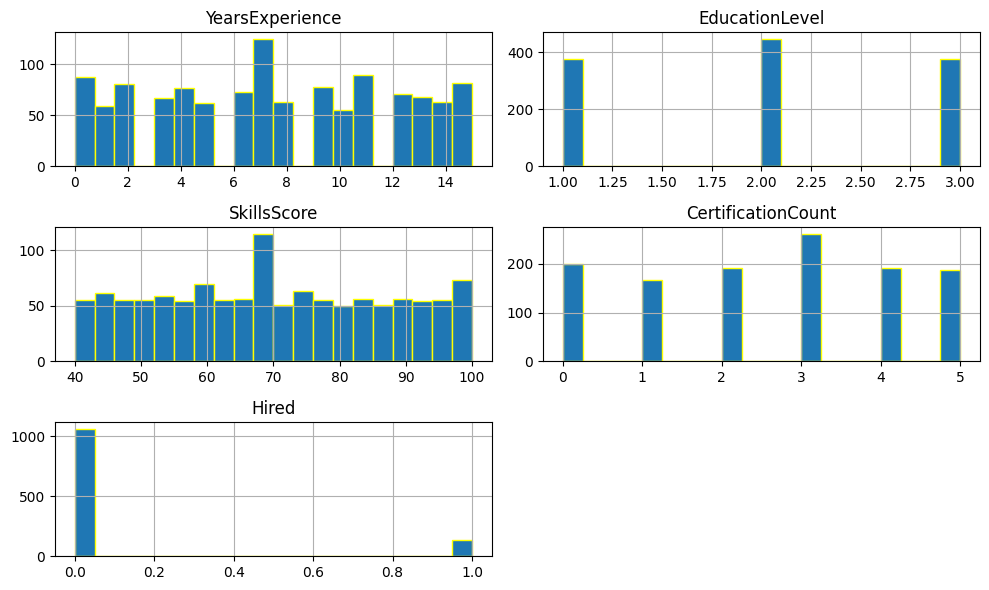

In [12]:
H_data.hist(figsize=(10,6), bins=20, edgecolor='yellow')
plt.tight_layout()
plt.show()


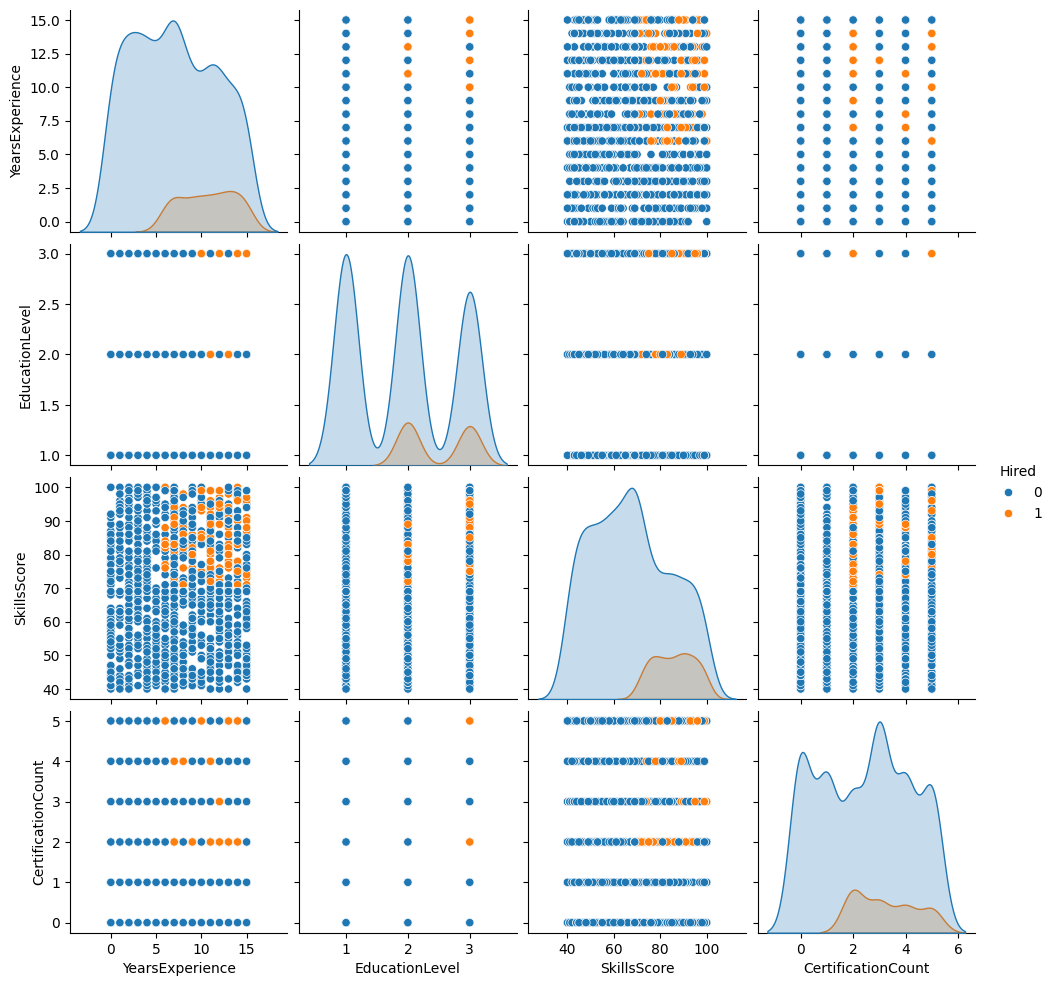

In [13]:
sns.pairplot(H_data, hue="Hired")
plt.show()


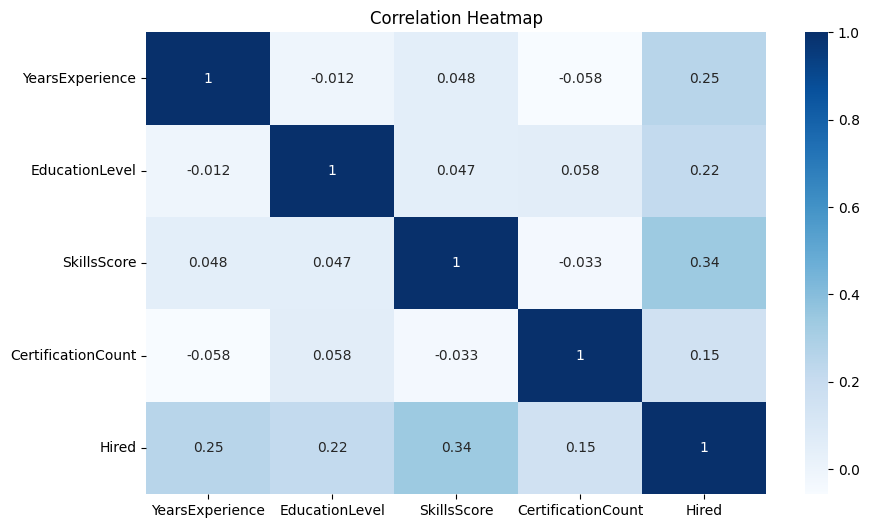

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(H_data.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


#### Prepare Data for ML

In [15]:
X = H_data.drop("Hired", axis=1)
y = H_data["Hired"]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
Hiring_m = LogisticRegression()
Hiring_m.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
y_pred = Hiring_m.predict(X_test_scaled)


In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9083333333333333


## Classification metrics
- 1. Real   predicted  Outcome
    - 1       1         T.P 
    - 1       0         F.N
    - 0       1         F.P
    - 0       0         T.N
    - Accuracy = TP+TN / (Tp+TN+FN+FP) 
    

In [22]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       213
           1       0.67      0.37      0.48        27

    accuracy                           0.91       240
   macro avg       0.80      0.67      0.71       240
weighted avg       0.90      0.91      0.90       240



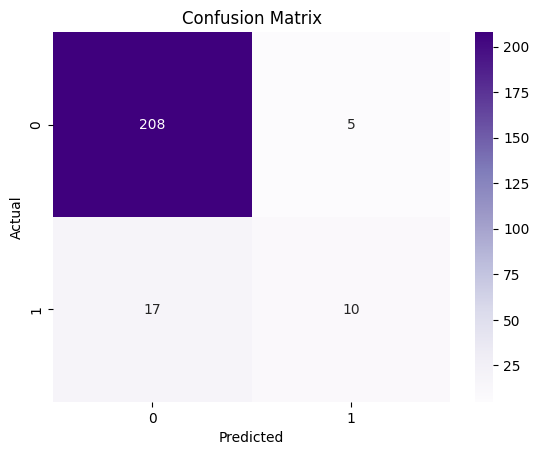

In [23]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Purples", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [25]:
import pickle

# Save the trained model
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(Hiring_m, file)

# Save the scaler (important for prediction)
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [26]:
import pickle

# Load model
with open("logistic_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Load scaler
with open("scaler.pkl", "rb") as file:
    loaded_scaler = pickle.load(file)

print("Model and scaler loaded!")


Model and scaler loaded!


### Predict on NEW Data Points
YearsExperience | EducationLevel | SkillsScore | CertificationCount



In [27]:
new_data = pd.DataFrame({
    "YearsExperience": [2, 7, 10],
    "EducationLevel": [1, 2, 3],
    "SkillsScore": [78, 91, 88],
    "CertificationCount": [1, 4, 5]
})


In [28]:
new_data_scaled = loaded_scaler.transform(new_data)


In [29]:
new_predictions = loaded_model.predict(new_data_scaled)
new_predictions


array([0, 0, 1], dtype=int64)

In [30]:
new_data["Predicted_Hired"] = new_predictions
new_data


,YearsExperience,EducationLevel,SkillsScore,CertificationCount,Predicted_Hired
0,2,1,78,1,0
1,7,2,91,4,0
2,10,3,88,5,1
